<a href="https://colab.research.google.com/github/xanasa14/Finances/blob/main/BuySell.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [173]:
#Importing needed libraries

import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


In [174]:
stock_price_df = pd.read_csv('/content/drive/MyDrive/YahooData/YahooFinanceData.csv')
#print(stock_price_df['AMZN'].head())
#print(stock_price_df['AMZN'].tail())


df = pd.DataFrame()
df['AMZN'] = stock_price_df['AMZN'].values
df = df.dropna()
df

,AMZN
0,753.669983
1,757.179993
2,780.450012
3,795.989990
4,796.919983
...,...
1071,3279.389893
1072,3299.300049
1073,3372.199951
1074,3379.389893


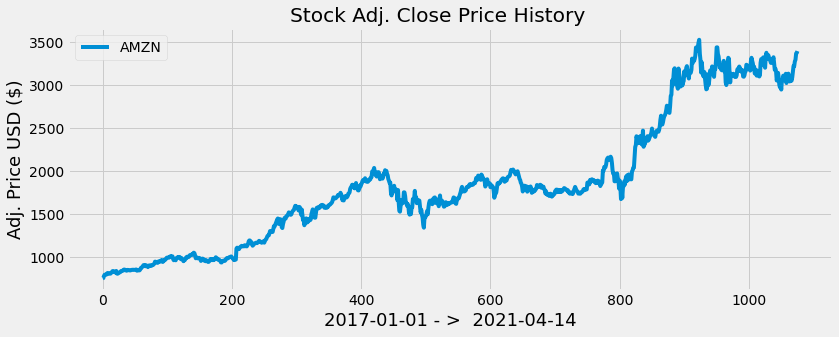

In [175]:
# Visually Show The Stock/Portfolio Price(s)
# Create the title 
title = 'Stock Adj. Close Price History    '
#Get the stocks
my_stocks = df
  
#Create and plot the graph
plt.figure(figsize=(12.2,4.5)) #width = 12.2in, height = 4.5
# Loop through each stock and plot the Adj Close for each day
for c in my_stocks.columns.values:
  plt.plot( my_stocks[c],  label=c)#plt.plot( X-Axis , Y-Axis, line_width, alpha_for_blending,  label)
  
plt.title(title)
plt.xlabel('2017-01-01 - >  2021-04-14',fontsize=18)
plt.ylabel('Adj. Price USD ($)',fontsize=18)
plt.legend(my_stocks.columns.values, loc='upper left')
plt.show()

In [176]:
#Create the 30 day simple moving average
SMA30 = df.rolling(window=30).mean()
SMA30

,AMZN
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
1071,3092.361003
1072,3097.020003
1073,3107.521338
1074,3117.070003


In [177]:
#Create the 100 day simple moving average
SMA100 = df.rolling(window=100).mean()
SMA100

,AMZN
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
1071,3173.561089
1072,3175.180190
1073,3177.799390
1074,3180.305188


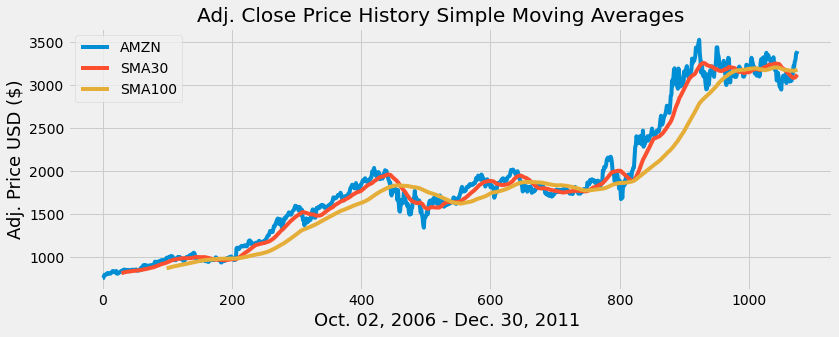

In [178]:
# Visually Show The Stock and The Moving Averages
# Create the title 
title = 'Adj. Close Price History Simple Moving Averages   '
#Get the stocks
my_stocks = df
  
#Create and plot the graph
plt.figure(figsize=(12.2,4.5)) #width = 12.2in, height = 4.5
plt.plot( my_stocks['AMZN'],  label='AMZN')#plt.plot( X-Axis , Y-Axis, line_width, alpha_for_blending,  label)
plt.plot( SMA30['AMZN'],  label='SMA30')
plt.plot( SMA100['AMZN'],  label='SMA100')
  
plt.title(title)
plt.xlabel('Oct. 02, 2006 - Dec. 30, 2011 ',fontsize=18)
plt.ylabel('Adj. Price USD ($)',fontsize=18)
plt.legend( loc='upper left')
plt.show()

In [179]:
#Create a function to signal when to buy and sell an asset
def buy_sell(signal):
  sigPriceBuy = []
  sigPriceSell = []
  flag = -1
  for i in range(0,len(signal)):
    #if sma30 > sma100  then buy else sell
      if signal['SMA30'][i] > signal['SMA100'][i]:
        if flag != 1:
          sigPriceBuy.append(signal['AMZN'][i])
          sigPriceSell.append(np.nan)
          flag = 1
        else:
          sigPriceBuy.append(np.nan)
          sigPriceSell.append(np.nan)
        #print('Buy')
      elif signal['SMA30'][i] < signal['SMA100'][i]:
        if flag != 0:
          sigPriceSell.append(signal['AMZN'][i])
          sigPriceBuy.append(np.nan)
          flag = 0
        else:
          sigPriceBuy.append(np.nan)
          sigPriceSell.append(np.nan)
        #print('sell')
      else: #Handling nan values
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)
  
  return (sigPriceBuy, sigPriceSell)

In [180]:
#Create a new dataframe
signal = pd.DataFrame(index=df['AMZN'].index)
signal['AMZN'] = df['AMZN']
signal['SMA30'] = SMA30['AMZN']
signal['SMA100'] = SMA100['AMZN']

In [181]:
signal

,AMZN,SMA30,SMA100
0,753.669983,NaN,NaN
1,757.179993,NaN,NaN
2,780.450012,NaN,NaN
3,795.989990,NaN,NaN
4,796.919983,NaN,NaN
...,...,...,...
1071,3279.389893,3092.361003,3173.561089
1072,3299.300049,3097.020003,3175.180190
1073,3372.199951,3107.521338,3177.799390
1074,3379.389893,3117.070003,3180.305188


In [182]:
x = buy_sell(signal)
signal['Buy_Signal_Price'] = x[0]
signal['Sell_Signal_Price'] = x[1]

In [183]:
signal


,AMZN,SMA30,SMA100,Buy_Signal_Price,Sell_Signal_Price
0,753.669983,NaN,NaN,NaN,NaN
1,757.179993,NaN,NaN,NaN,NaN
2,780.450012,NaN,NaN,NaN,NaN
3,795.989990,NaN,NaN,NaN,NaN
4,796.919983,NaN,NaN,NaN,NaN
...,...,...,...,...,...
1071,3279.389893,3092.361003,3173.561089,NaN,NaN
1072,3299.300049,3097.020003,3175.180190,NaN,NaN
1073,3372.199951,3107.521338,3177.799390,NaN,NaN
1074,3379.389893,3117.070003,3180.305188,NaN,NaN


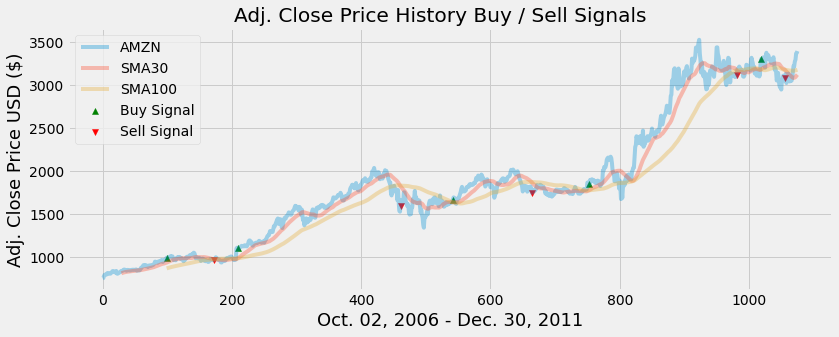

In [184]:
# Visually Show The Stock buy and sell signals
# Create the title 
title = 'Adj. Close Price History Buy / Sell Signals   '
#Get the stocks
my_stocks = signal
ticker = 'AMZN'
  
#Create and plot the graph
plt.figure(figsize=(12.2,4.5)) #width = 12.2in, height = 4.5
plt.scatter(my_stocks.index, my_stocks['Buy_Signal_Price'], color = 'green', label='Buy Signal', marker = '^', alpha = 1)
plt.scatter(my_stocks.index, my_stocks['Sell_Signal_Price'], color = 'red', label='Sell Signal', marker = 'v', alpha = 1)
plt.plot( my_stocks[ticker],  label=ticker, alpha = 0.35)#plt.plot( X-Axis , Y-Axis, line_width, alpha_for_blending,  label)
plt.plot( my_stocks['SMA30'],  label='SMA30', alpha = 0.35)
plt.plot( my_stocks['SMA100'],  label='SMA100', alpha = 0.35)
plt.title(title)
plt.xlabel('Oct. 02, 2006 - Dec. 30, 2011',fontsize=18)
plt.ylabel('Adj. Close Price USD ($)',fontsize=18)
plt.legend( loc='upper left')
plt.show()

In [185]:
def buy_and_sell(stock_price):
    max_profit_val, current_max_val = 0, 0 
    for price in reversed(stock_price):                       
        current_max_val = max(current_max_val, price)          
        potential_profit = current_max_val - price          
        max_profit_val = max(potential_profit, max_profit_val)

    return max_profit_val


AMZN = list(df["AMZN"])

last30 = AMZN[-30:]
print(buy_and_sell(last30))

448.050048828125


In [186]:
last30

[3094.530029296875,
 3005.0,
 2977.570068359375,
 3000.4599609375,
 2951.949951171875,
 3062.85009765625,
 3057.639892578125,
 3113.590087890625,
 3089.489990234375,
 3081.679931640625,
 3091.860107421875,
 3135.72998046875,
 3027.989990234375,
 3074.9599609375,
 3110.8701171875,
 3137.5,
 3087.070068359375,
 3046.260009765625,
 3052.030029296875,
 3075.72998046875,
 3055.2900390625,
 3094.080078125,
 3161.0,
 3226.72998046875,
 3223.820068359375,
 3279.389892578125,
 3299.300048828125,
 3372.199951171875,
 3379.389892578125,
 3400.0]

MFI 
Money Flow Index (MFI)


In [187]:
!pip install yfinance
!pip install yahoofinancials

In [208]:
import pandas as pd
import numpy as np
import yfinance as yf
from yahoofinancials import YahooFinancials
company = 'DIS'
startDate = "2021-01-20"

endDate = "2021-04-21"
dataframe = yf.download(company, 
                      start=startDate, 
                      end=endDate, 
                      progress=False)

dataframe

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-20,175.220001,177.880005,173.000000,173.639999,173.639999,9809200
2021-01-21,173.240005,175.000000,171.020004,171.279999,171.279999,8423900
2021-01-22,174.000000,175.250000,171.889999,172.779999,172.779999,9517200
2021-01-25,171.889999,173.110001,168.770004,171.889999,171.889999,7833700
2021-01-26,173.000000,173.350006,169.050003,169.559998,169.559998,7523200
...,...,...,...,...,...,...
2021-04-14,185.970001,190.399994,185.710007,187.460007,187.460007,9089900
2021-04-15,188.089996,188.899994,185.699997,185.929993,185.929993,7262500
2021-04-16,187.570007,189.470001,186.199997,187.259995,187.259995,9449100


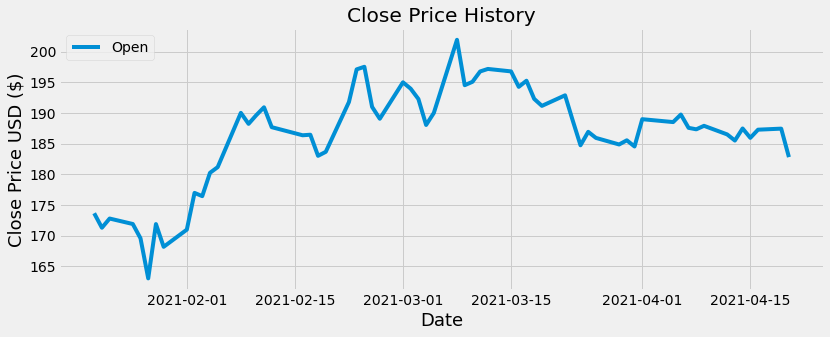

In [209]:
#Visually Show The Stock Price
#Create and plot the graph
plt.figure(figsize=(12.2,4.5)) #width = 12.2in, height = 4.5
plt.plot( dataframe['Close'],  label='Close Price')#plt.plot( X-Axis , Y-Axis, line_width, alpha_for_blending,  label)  
plt.title('Close Price History')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.legend(dataframe.columns.values, loc='upper left')
plt.show()

In [210]:
#Calculate the typical price
typical_price = (dataframe['Close'] + dataframe['High'] + dataframe['Low']) / 3
typical_price

Date
2021-01-20    174.840001
2021-01-21    172.433334
2021-01-22    173.306666
2021-01-25    171.256668
2021-01-26    170.653336
                 ...    
2021-04-14    187.856669
2021-04-15    186.843328
2021-04-16    187.643331
2021-04-19    187.803329
2021-04-20    184.211665
Length: 63, dtype: float64

In [211]:
period =  14 #The typical period used for MFI is 14 days


In [212]:
#Calculate the money flow
money_flow = typical_price * dataframe['Volume']
money_flow

Date
2021-01-20    1.715041e+09
2021-01-21    1.452561e+09
2021-01-22    1.649394e+09
2021-01-25    1.341573e+09
2021-01-26    1.283859e+09
                  ...     
2021-04-14    1.707598e+09
2021-04-15    1.356950e+09
2021-04-16    1.773061e+09
2021-04-19    1.431024e+09
2021-04-20    1.848163e+09
Length: 63, dtype: float64

In [213]:
#Get all of the positive and negative money flows 
#where the current typical price is higher than the previous day's typical price, we will append that days money flow to a positive list
#and where the current typical price is lower than the previous day's typical price, we will append that days money flow to a negative list
#and set any other value to 0 to be used when summing
positive_flow =[] #Create a empty list called positive flow
negative_flow = [] #Create a empty list called negative flow
#Loop through the typical price 
for i in range(1, len(typical_price)):
  if typical_price[i] > typical_price[i-1]: #if the present typical price is greater than yesterdays typical price
    positive_flow.append(money_flow[i-1])# Then append money flow at position i-1 to the positive flow list
    negative_flow.append(0) #Append 0 to the negative flow list
  elif typical_price[i] < typical_price[i-1]:#if the present typical price is less than yesterdays typical price
    negative_flow.append(money_flow[i-1])# Then append money flow at position i-1 to negative flow list
    positive_flow.append(0)#Append 0 to the positive flow list
  else: #Append 0 if the present typical price is equal to yesterdays typical price
    positive_flow.append(0)
    negative_flow.append(0)


In [214]:
#Get all of the positive and negative money flows within the time period
positive_mf =[]
negative_mf = [] 
#Get all of the positive money flows within the time period
for i in range(period-1, len(positive_flow)):
  positive_mf.append(sum(positive_flow[i+1-period : i+1]))
#Get all of the negative money flows within the time period  
for i in range(period-1, len(negative_flow)):
  negative_mf.append(sum(negative_flow[i+1-period : i+1]))

In [215]:
mfi = 100 * (np.array(positive_mf) / (np.array(positive_mf)  + np.array(negative_mf) ))
mfi

array([54.81360762, 62.16700842, 63.18185623, 59.49230764, 52.40102546,
       50.98765616, 43.05464746, 43.29931806, 42.33257062, 46.07426062,
       49.63534308, 44.16063856, 39.04247829, 41.7343812 , 47.96404267,
       43.16064496, 38.10245992, 39.04543748, 48.22968458, 44.57729338,
       41.82022504, 48.05389427, 43.24480393, 35.39316077, 25.70915663,
       26.65822698, 26.41214303, 18.81902005, 25.063521  , 25.01108468,
       24.7940227 , 24.68497037, 24.43002168, 26.55744132, 33.43638502,
       30.0408768 , 36.01787291, 42.45460364, 48.32620172, 48.95554705,
       51.95198124, 58.34524739, 45.86461835, 46.85776066, 54.62996013,
       56.86391886, 55.93596942, 65.35062454, 58.10634522])

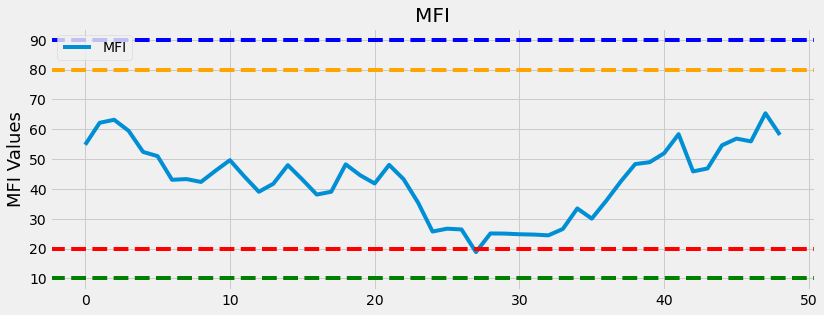

In [216]:
# Visually Show The Money Flow Index
df2 = pd.DataFrame()
df2['MFI'] = mfi
#Create and plot the graph
plt.figure(figsize=(12.2,4.5)) #width = 12.2in, height = 4.5
plt.plot( df2['MFI'],  label='MFI')#plt.plot( X-Axis , Y-Axis, line_width, alpha_for_blending,  label)
plt.axhline(10, linestyle='--', color = 'green')  #Over Sold line (Buy)
plt.axhline(20, linestyle='--',color = 'red')  #Over Sold Line (Buy)
plt.axhline(80, linestyle='--', color = 'orange')  #Over Bought line (Sell)
plt.axhline(90, linestyle='--', color = 'blue')  #Over Bought line (Sell)
plt.title('MFI')
plt.ylabel('MFI Values',fontsize=18)
plt.legend(df2.columns.values, loc='upper left')
plt.show()

In [217]:
""

''

In [218]:
dataframe.describe()

,Open,High,Low,Close,Adj Close,Volume
count,63.000000,63.000000,63.000000,63.000000,63.000000,6.300000e+01
mean,186.704127,188.801509,184.061587,186.370317,186.370317,1.154285e+07
std,8.487413,8.416637,8.192261,8.234315,8.234315,5.056206e+06
min,165.009995,166.339996,160.520004,163.029999,163.029999,5.508600e+06
25%,183.840004,186.360001,181.990005,184.084999,184.084999,8.033300e+06
50%,188.089996,190.330002,185.589996,187.559998,187.559998,1.003282e+07
75%,193.114998,194.550003,189.209999,191.449997,191.449997,1.304140e+07
max,200.190002,203.020004,195.399994,201.910004,201.910004,2.720090e+07


In [219]:
buySellQuick = ['DIS',"AMZN",'TSLA',"DXCM",'SNAP','NFLX']


In [220]:
finalData=pd.DataFrame()
for company in buySellQuick:
  tsla_df = yf.download(company, 
                      start=startDate, 
                      end=endDate, 
                      progress=False)
  tsla_df = tsla_df.drop(columns=['Open', 'High','Low', 'Volume',"Adj Close"])
  tsla_df = tsla_df.rename(columns={'Close': company})
  tmp = tsla_df[str(company)]

  finalData = finalData.append(tmp, ignore_index=True)
finalData
finalData = finalData.T # or df2.transpose()
for i in range(len(buySellQuick)):
  finalData = finalData.rename(columns={i: buySellQuick[i]})





In [221]:
finalData.describe()

,DIS,AMZN,TSLA,DXCM,SNAP,NFLX
count,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000
mean,186.370317,3204.808877,733.042220,378.635717,59.045079,538.400161
std,8.234315,125.785859,84.675738,21.936620,5.131853,19.782094
min,163.029999,2951.949951,563.000000,339.149994,48.950001,493.329987
25%,184.084999,3090.675049,670.484985,360.620010,54.445002,522.359985
50%,187.559998,3226.729980,707.940002,374.850006,59.619999,540.669983
75%,191.449997,3310.584961,808.239990,398.610001,62.840000,552.470001
max,201.910004,3400.000000,883.090027,418.940002,70.449997,586.340027


In [222]:
finalData

,DIS,AMZN,TSLA,DXCM,SNAP,NFLX
2021-01-20,173.639999,3263.379883,850.450012,364.119995,52.200001,586.340027
2021-01-21,171.279999,3306.989990,844.989990,367.500000,54.400002,579.840027
2021-01-22,172.779999,3292.229980,846.640015,370.119995,53.570000,565.169983
2021-01-25,171.889999,3294.000000,880.799988,376.390015,53.650002,556.780029
2021-01-26,169.559998,3326.129883,883.090027,361.420013,53.290001,561.929993
...,...,...,...,...,...,...
2021-04-14,187.460007,3333.000000,732.229980,391.100006,62.009998,540.020020
2021-04-15,185.929993,3379.090088,738.849976,399.489990,63.889999,549.219971
2021-04-16,187.259995,3399.439941,739.780029,400.040009,61.250000,546.539978
2021-04-19,187.429993,3372.010010,714.630005,393.040009,60.439999,554.440002


In [227]:
for i in finalData:
  print(i)
  print(finalData[i].iloc[-1])

DIS
182.7899932861328
AMZN
3334.68994140625
TSLA
718.989990234375
DXCM
388.9100036621094
SNAP
58.4900016784668
NFLX
549.5700073242188
